#連結Google Dribe

In [46]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Generate custom "point_clouds_t_0.15.npy", "point_clouds_labels_t_0.15.npy" 來訓練

In [ ]:
import pandas as pd
import numpy as np
import os

directory = '/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/'
groups = ['牡丹皮','川芎','薄荷']

#參數設定
#############################################################
num_files = 200
LABELS = ['牡丹皮','川芎','薄荷']
  # 對應顏色
COLORS = ['blue', 'green', 'red']


# 訓練和驗證集比例
VAL_SPLIT = 0.15
# 每份資料取點數目
NUM_SAMPLE_POINTS = 4096
# NUM_SAMPLE_POINTS = len(point_clouds[0])
#############################################################

point_clouds = []
point_cloud_labels = []
all_labels = []

temp_point_clouds_labels_array = []
temp_all_labels_array = []

for file_index in range(1, num_files+1):

    for group in groups:
        temp_point_clouds_array = []
        file_path = os.path.join(directory, f'{group}/{group}_noi-{file_index}.csv')
        print(file_path)
        if os.path.exists(file_path):
            df = pd.read_csv(file_path)
            df = df.rename(columns={"Wavelength": "Time"})
            df = df.melt(id_vars=["Time"], var_name="Wavelength", value_name="Height")

            df["Height"] = pd.to_numeric(df["Height"], errors='coerce')
            df = df.dropna(subset=["Height"])
# 將小於0.15的，沒有代表性的資料捨去
            df_filtered = df[df["Height"] >= 0.15]
# random sample

# Perform random sampling on the "Wavelength" column
            #random_times紀錄random_sample選取的indices
            filtered_array = df_filtered.to_numpy()
            # print(len(filtered_array))
            if(len(filtered_array)>NUM_SAMPLE_POINTS):
              idx = np.random.choice(np.arange(filtered_array.shape[0]),int(len(filtered_array)/3))
              result_array = filtered_array[idx]
              print(len(result_array))
            else:
              result_array = filtered_array
              print(len(result_array))

            # cloud_label_element = np.zeros(len(groups)+1)
            # cloud_label_element[groups.index(group)] = 1

            temp_point_clouds_array.append(result_array)
            temp_point_clouds_labels_array.append(groups.index(group))
            # print(temp_point_clouds_labels_array)
# 處理好一個class的array
            temp_point_clouds_array = np.vstack(temp_point_clouds_array)
            point_clouds.append(temp_point_clouds_array.astype(float))
            # temp_all_labels_array.extend([group] * result_array.shape[0])

print(f"finish {file_index}")
#在所有的array加入之後，把sequence轉換成array
temp_point_clouds_labels_array = np.array(temp_point_clouds_labels_array)
# temp_all_labels_array = np.array(temp_all_labels_array)


point_cloud_labels.append(temp_point_clouds_labels_array.astype(float))
            # all_labels.append(temp_all_labels_array.astype("U10"))


print("Files saved successfully.")
print(point_clouds)
print(point_cloud_labels)

# print(point_clouds.shape)
# print(point_cloud_labels.shape)



/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-1.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


4831
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-1.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


3039
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-1.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2127
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-2.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


4575
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-2.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


1907
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-2.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2564
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-3.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


4690
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-3.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


3137
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-3.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


1695
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-4.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


3382
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-4.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


3158
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-4.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2772
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-5.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


5348
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-5.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


3104
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-5.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2678
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-6.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


4632
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-6.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


1901
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-6.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


1552
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-7.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


3909
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-7.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2633
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-7.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2008
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-8.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


3845
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-8.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2285
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-8.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


1628
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-9.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


5312
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-9.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2924
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-9.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2539
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-10.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


4778
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-10.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2111
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-10.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2779
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-11.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


4610
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-11.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2625
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-11.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2608
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-12.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


3929
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-12.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


1882
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-12.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


1721
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-13.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


4222
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-13.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2859
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-13.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


1764
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-14.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


4234
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-14.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2264
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-14.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2695
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-15.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


4492
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-15.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2180
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-15.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2655
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-16.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


4188
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-16.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2828
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-16.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2717
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-17.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


5188
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-17.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2402
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-17.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2033
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-18.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


5005
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-18.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


3170
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-18.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


1660
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-19.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


3636
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-19.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


1808
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-19.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2458
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-20.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


5297
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-20.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


1811
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-20.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2045
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-21.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


4705
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-21.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2899
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-21.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2795
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-22.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


5192
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-22.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2711
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-22.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


1918
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-23.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


5099
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-23.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2106
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-23.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


1550
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-24.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


3645
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-24.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2346
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-24.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2540
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-25.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


5274
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-25.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


1894
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-25.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2701
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-26.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


5541
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-26.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


1946
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-26.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2743
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-27.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


5344
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-27.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2882
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-27.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2488
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-28.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


4744
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-28.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


3177
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-28.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2710
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-29.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


5622
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-29.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


1889
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-29.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2718
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-30.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


5607
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-30.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2634
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-30.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


1523
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-31.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


3381
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-31.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


3008
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-31.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


1864
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-32.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


4142
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-32.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2261
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-32.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2804
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-33.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


5146
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-33.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2856
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-33.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2660
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-34.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


4736
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-34.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2836
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-34.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2739
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-35.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


4896
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-35.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


3166
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-35.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


1662
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-36.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


5028
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-36.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2992
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-36.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2149
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-37.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


4845
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-37.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


3069
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-37.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2628
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-38.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


3457
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-38.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2547
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-38.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2684
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-39.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


5220
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-39.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


1800
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-39.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2064
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-40.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


3879
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-40.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2269
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-40.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


1512
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-41.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


5204
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-41.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2874
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-41.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


1670
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-42.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


3715
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-42.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2781
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-42.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


1843
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-43.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


5263
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-43.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2363
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-43.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2374
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-44.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


4298
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-44.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2253
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-44.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2035
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-45.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


4987
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-45.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2756
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-45.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2395
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-46.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


5105
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-46.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2522
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-46.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2295
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-47.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


5219
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-47.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


3107
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-47.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2007
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-48.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


4695
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-48.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2220
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-48.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2450
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-49.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


5444
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-49.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2078
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-49.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2435
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-50.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


4689
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-50.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2405
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-50.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2120
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-51.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


4061
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-51.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2438
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-51.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2296
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-52.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


4481
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-52.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


3085
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-52.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2241
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-53.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


4824
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-53.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


3101
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-53.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2777
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-54.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


4480
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-54.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2483
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-54.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2448
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-55.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


5087
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-55.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2173
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-55.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2076
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-56.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


4512
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-56.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2319
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-56.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


1595
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-57.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


3671
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-57.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2175
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-57.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2483
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-58.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


3976
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-58.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2588
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-58.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2453
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-59.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


5196
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-59.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2384
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-59.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


1892
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-60.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


4150
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-60.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2440
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-60.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2376
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-61.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


4372
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-61.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


1868
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-61.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2584
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-62.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


3395
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-62.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2261
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-62.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


1914
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-63.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


3834
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-63.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


1806
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-63.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


1951
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-64.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


3603
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-64.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2605
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-64.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


1871
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-65.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


4763
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-65.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2308
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-65.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


1753
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-66.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


4735
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-66.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


1962
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-66.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2773
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-67.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


5310
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-67.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2274
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-67.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2155
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-68.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


3984
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-68.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2474
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-68.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


1798
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-69.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


3340
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-69.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2356
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-69.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


1580
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-70.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


4359
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-70.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


1902
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-70.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2524
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-71.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


4696
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-71.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2462
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-71.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2037
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-72.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


5157
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-72.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2131
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-72.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


1753
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-73.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


3500
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-73.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2269
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-73.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2660
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-74.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


4948
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-74.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2230
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-74.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


1630
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-75.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


4507
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-75.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2832
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-75.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2717
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-76.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


4802
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-76.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2304
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-76.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


1705
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-77.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


4521
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-77.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2008
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-77.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2676
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-78.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


4571
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-78.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2580
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-78.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2148
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-79.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


4806
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-79.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2142
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-79.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


1805
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-80.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


5284
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-80.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2940
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-80.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2493
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-81.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


5174
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-81.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


3131
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-81.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2060
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-82.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


3595
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-82.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2522
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-82.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2155
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-83.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


5261
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-83.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2589
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-83.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2680
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-84.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


3967
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-84.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2397
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-84.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2741
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-85.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


4288
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-85.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


3009
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-85.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2057
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-86.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


3923
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-86.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2553
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-86.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2372
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-87.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


4558
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-87.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2314
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-87.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2019
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-88.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


4439
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-88.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2425
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-88.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


1653
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-89.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


4364
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-89.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2831
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-89.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2306
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-90.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


4782
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-90.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


3005
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-90.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


1791
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-91.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


4246
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-91.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2249
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-91.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2174
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-92.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


4459
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-92.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2677
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-92.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2278
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-93.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


4776
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-93.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


3033
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-93.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


1760
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-94.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


3359
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-94.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2562
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-94.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2378
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-95.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


3580
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-95.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2045
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-95.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2294
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-96.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


5369
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-96.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2610
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-96.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2624
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-97.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


4738
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-97.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2586
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-97.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2641
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-98.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


4683
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-98.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2215
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-98.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


1983
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-99.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


4709
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-99.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


3042
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-99.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2104
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-100.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


3335
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-100.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2053
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-100.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2130
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-101.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


5187
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-101.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2330
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-101.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2751
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-102.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


4097
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-102.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


3161
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-102.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2730
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-103.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


4759
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-103.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


3103
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-103.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


1992
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-104.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


3626
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-104.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


3169
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-104.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2559
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-105.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


5369
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-105.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2316
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-105.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


1844
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-106.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


3589
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-106.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2877
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-106.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2522
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-107.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


5458
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-107.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2460
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-107.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2693
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-108.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


4284
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-108.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2616
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-108.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2426
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-109.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


4936
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-109.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


3083
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-109.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2773
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-110.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


5473
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-110.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


3073
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-110.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2304
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-111.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


4466
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-111.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2354
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-111.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


1608
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-112.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


5418
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-112.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2220
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-112.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2156
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-113.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


5021
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-113.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2159
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-113.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2406
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-114.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


5151
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-114.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


3014
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-114.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2477
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-115.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


5197
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-115.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


3002
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-115.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2588
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-116.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


3941
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-116.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2678
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-116.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


1762
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-117.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


5604
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-117.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2196
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-117.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


1536
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-118.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


3369
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-118.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


3044
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-118.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


1536
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-119.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


3676
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-119.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2880
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-119.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


1558
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-120.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


4458
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-120.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


1820
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-120.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


1737
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-121.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


4008
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-121.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2603
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-121.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2521
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-122.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


4256
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-122.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2335
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-122.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


1614
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-123.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


4947
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-123.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


3022
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-123.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2614
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-124.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


4729
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-124.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2695
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-124.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


1892
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-125.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


4490
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-125.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2534
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-125.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


1509
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-126.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


5073
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-126.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2655
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-126.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2694
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-127.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


3418
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-127.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2323
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-127.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2521
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-128.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


4168
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-128.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


1836
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-128.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


1785
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-129.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


4593
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-129.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2211
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-129.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2477
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-130.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


4970
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-130.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2860
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-130.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2291
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-131.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


3412
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-131.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


1919
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-131.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2120
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-132.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


4789
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-132.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2426
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-132.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2820
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-133.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


3788
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-133.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2666
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-133.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2271
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-134.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


4683
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-134.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2684
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-134.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2233
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-135.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


3907
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-135.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2628
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-135.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


1549
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-136.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


4579
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-136.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


1825
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-136.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2536
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-137.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


4665
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-137.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2941
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-137.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2663
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-138.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


5459
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-138.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2673
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-138.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


1981
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-139.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


3683
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-139.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2296
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-139.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2526
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-140.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


3907
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-140.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2273
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-140.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2329
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-141.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


3988
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-141.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


1897
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-141.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2486
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-142.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


5342
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-142.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2882
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-142.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2451
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-143.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


4753
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-143.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


3096
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-143.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2038
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-144.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


4540
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-144.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2816
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-144.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


1575
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-145.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


3626
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-145.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


3063
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-145.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2523
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-146.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


3834
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-146.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2380
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-146.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2515
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-147.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


5237
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-147.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2968
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-147.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2561
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-148.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


4339
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-148.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2251
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-148.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


1965
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-149.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


4168
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-149.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2163
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-149.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2210
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-150.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


4685
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-150.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2652
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-150.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


1626
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-151.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


3752
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-151.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2989
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-151.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2273
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-152.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


3730
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-152.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2400
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-152.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


1906
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-153.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


4942
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-153.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2813
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-153.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


1578
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-154.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


3346
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-154.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


3057
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-154.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2705
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-155.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


3510
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-155.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2643
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-155.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2551
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-156.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


5125
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-156.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2399
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-156.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2664
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-157.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


3568
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-157.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


1816
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-157.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2634
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-158.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


5521
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-158.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2544
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-158.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2202
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-159.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


4481
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-159.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


1858
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-159.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2354
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-160.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


4745
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-160.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2247
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-160.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2553
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-161.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


4124
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-161.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


3070
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-161.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


1963
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-162.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


5168
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-162.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2934
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-162.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2526
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-163.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


3489
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-163.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2818
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-163.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


1772
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-164.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


4478
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-164.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2677
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-164.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


1558
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-165.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


3725
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-165.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


3103
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-165.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2433
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-166.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


3515
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-166.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


1838
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-166.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2144
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-167.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


5582
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-167.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2013
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-167.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2262
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-168.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


4719
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-168.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2717
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-168.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


1881
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-169.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


4409
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-169.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2495
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-169.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2685
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-170.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


4116
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-170.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2542
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-170.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2275
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-171.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


4708
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-171.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


3066
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-171.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2515
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-172.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


5318
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-172.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2823
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-172.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2598
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-173.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


5296
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-173.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2893
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-173.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


1666
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-174.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


3855
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-174.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


3145
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-174.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2135
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-175.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


5485
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-175.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


3089
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-175.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2822
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-176.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


3561
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-176.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2589
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-176.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2648
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-177.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


4825
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-177.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


3122
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-177.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


1990
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-178.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


4914
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-178.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2994
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-178.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


1977
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-179.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


3931
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-179.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2897
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-179.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


1570
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-180.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


3999
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-180.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2522
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-180.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2342
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-181.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


3607
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-181.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


1936
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-181.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2016
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-182.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


4400
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-182.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2214
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-182.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2741
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-183.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


4935
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-183.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


1996
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-183.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2253
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-184.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


3810
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-184.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2446
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-184.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2698
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-185.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


4193
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-185.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2149
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-185.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


1723
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-186.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


3945
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-186.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2931
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-186.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2120
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-187.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


4667
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-187.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2457
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-187.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2015
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-188.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


5098
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-188.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2542
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-188.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


1946
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-189.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


3675
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-189.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2673
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-189.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2232
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-190.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


5569
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-190.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2007
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-190.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2465
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-191.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


3756
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-191.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2553
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-191.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2137
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-192.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


4690
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-192.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


1809
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-192.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2497
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-193.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


3770
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-193.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2631
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-193.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


1928
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-194.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


4403
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-194.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2771
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-194.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2231
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-195.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


4140
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-195.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


3156
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-195.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


1891
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-196.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


4023
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-196.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2705
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-196.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2111
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-197.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


5553
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-197.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


3129
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-197.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2774
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-198.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


4870
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-198.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


1889
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-198.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


1889
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-199.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


4326
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-199.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2182
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-199.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


1639
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/牡丹皮/牡丹皮_noi-200.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


3458
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/川芎/川芎_noi-200.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


1949
/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/薄荷/薄荷_noi-200.csv


<ipython-input-66-d46b9c0e638e>:37: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


2655
finish 200
Files saved successfully.
[array([[3.52500000e+01, 2.21223000e+02, 3.66129710e-01],
       [3.86833300e+01, 2.28302000e+02, 2.36259679e-01],
       [3.52500000e+01, 2.23582000e+02, 3.08180013e-01],
       ...,
       [5.24500000e+01, 2.01206000e+02, 3.86939030e-01],
       [8.62333300e+01, 1.89458000e+02, 2.63659756e-01],
       [3.80833300e+01, 3.17381000e+02, 2.18781313e-01]]), array([[6.92000000e+01, 2.97099000e+02, 5.03727883e-01],
       [6.13166700e+01, 1.89458000e+02, 1.69943125e-01],
       [6.24500000e+01, 2.07086000e+02, 1.51840864e-01],
       ...,
       [6.47666700e+01, 1.97679000e+02, 1.37310112e+00],
       [5.91000000e+01, 1.89458000e+02, 1.54662388e-01],
       [7.79666700e+01, 1.90632000e+02, 2.11775206e-01]]), array([[7.73166700e+01, 1.89458000e+02, 2.40401501e-01],
       [8.64833300e+01, 1.90632000e+02, 1.69300643e-01],
       [3.80000000e+01, 2.21223000e+02, 6.61299705e-01],
       ...,
       [3.89333300e+01, 3.20966000e+02, 3.18159376e-01],
     

In [ ]:
np.save(os.path.join(directory, 'point_clouds_thres_0.15_div5_for_classification.npy'), point_clouds)
np.save(os.path.join(directory, 'point_cloud_labels_thres_0.15_div5_for_classification.npy'), point_cloud_labels)

#載入資料和處理


In [61]:
import numpy as np
# original
point_clouds_labels_t_015= np.load('/content/drive/MyDrive/點雲圖資料/classification/point_clouds.npy')
lables_original= np.load('/content/drive/MyDrive/點雲圖資料/classification/lables.npy')
# custom_point_class = np.load('/content/drive/MyDrive/點雲圖資料/classification/custom_point_class.npy')
# custom_labels = np.load('/content/drive/MyDrive/點雲圖資料/classification/custom_labels.npy')

#my data
point_clouds = np.load('/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/point_clouds_thres_0.15_div5_for_classification.npy',allow_pickle=True)
point_cloud_labels = np.load('/content/drive/MyDrive/重要的東西_先別刪/增幅資料生成/data_csv/point_cloud_labels_thres_0.15_div5_for_classification.npy',allow_pickle= True)
point_cloud_labels = point_cloud_labels[0]


## 看資料的模樣 297筆資料 每筆資料有500個不同的點 每個點紀錄3個資訊


In [57]:
# print(point_clouds.shape())
# print(lables.shape())
# print(lables[:2])
# print(custom_labels[:2])
print(point_clouds.shape)
print(point_cloud_labels.shape())
# print(custom_point_class.shape)
# print(custom_labels.shape)

(600, 500, 3)


TypeError: 'tuple' object is not callable

#參數設定

In [62]:
NUM_POINTS = 300
NUM_CLASSES = 3
BATCH_SIZE = 12

In [65]:
#將資料進行正規化
temp_point_clouds = point_clouds
point_clouds = []
for point_cloud in temp_point_clouds:
from tqdm import tqdm
import random
for index in tqdm(range(len(temp_point_clouds))):
    current_point_cloud = temp_point_clouds[index]
    num_points = len(current_point_cloud)
    # Randomly sampling respective indices.
    sampled_indices = random.sample(list(range(num_points)), NUM_POINTS)
    # Sampling points corresponding to sampled indices.
    sampled_point_cloud = np.array([current_point_cloud[i] for i in sampled_indices])
    # Sampling corresponding one-hot encoded labels.


    # Normalizing sampled point cloud.
    norm_point_cloud = sampled_point_cloud - np.mean(sampled_point_cloud, axis=0)
    norm_point_cloud /= np.max(np.linalg.norm(norm_point_cloud, axis=1))
    temp_point_clouds[index] = norm_point_cloud

0it [00:00, ?it/s]


In [52]:
#把point_clouds和lable分成測試及和訓練集
# train_points= point_clouds[:237]
# test_points= point_clouds[237:]
# train_labels= point_cloud_labels[:237]
# test_labels= point_cloud_labels[237:]

train_points= point_clouds[:137]
test_points= point_clouds[137:]
train_labels= point_cloud_labels[:137]
test_labels= point_cloud_labels[137:]

# with my data
# train_points= point_clouds_t_015[:237]
# test_points= point_clouds_t_015[237:]
# train_labels= point_clouds_labels_t_015[:237]
# test_labels= point_clouds_labels_t_015[237:]

#設定每個class對應的數字
CLASS_MAP = {0:'gancao', 1:'chuanqiong',2: 'fangfong'}
CLASS_MAP = {0:'mudapi', 1:'chunqiong', 2:'boho'}
# LABELS = ['牡丹皮','川芎','薄荷']

# **訓練開始**

In [23]:
!pip install trimesh

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 694.6/694.6 kB 8.4 MB/s eta 0:00:00


In [24]:
!pip install keras_core

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 9.5 MB/s eta 0:00:00


In [25]:
import os
import glob
import trimesh
import numpy as np
from tensorflow import data as tf_data
import keras
from keras import layers
from matplotlib import pyplot as plt
import tensorflow
import keras_core

keras.utils.set_random_seed(seed=42)

Using TensorFlow backend


In [26]:
def augment(points, label):
    # jitter points
    points += tensorflow.random.uniform(points.shape, -0.005, 0.005, dtype="float64")
    # shuffle points
    points = tensorflow.random.shuffle(points)
    return points, label


train_size = 0.8
dataset = tf_data.Dataset.from_tensor_slices((train_points, train_labels))
test_dataset = tf_data.Dataset.from_tensor_slices((test_points, test_labels))
train_dataset_size = int(len(dataset) * train_size)

dataset = dataset.shuffle(len(train_points)).map(augment)
test_dataset = test_dataset.shuffle(len(test_points)).batch(BATCH_SIZE)

train_dataset = dataset.take(train_dataset_size).batch(BATCH_SIZE)
validation_dataset = dataset.skip(train_dataset_size).batch(BATCH_SIZE)

In [27]:

def conv_bn(x, filters):
    x = layers.Conv1D(filters, kernel_size=1, padding="valid")(x)
    x = layers.BatchNormalization(momentum=0.0)(x)
    return layers.Activation("relu")(x)


def dense_bn(x, filters):
    x = layers.Dense(filters)(x)
    x = layers.BatchNormalization(momentum=0.0)(x)
    return layers.Activation("relu")(x)

In [28]:

class OrthogonalRegularizer(keras.regularizers.Regularizer):
    def __init__(self, num_features, l2reg=0.001):
        self.num_features = num_features
        self.l2reg = l2reg
        self.eye = keras_core.ops.eye(num_features)

    def __call__(self, x):
        x = keras_core.ops.reshape(x, (-1, self.num_features, self.num_features))
        xxt = keras_core.ops.tensordot(x, x, axes=(2, 2))
        xxt = keras_core.ops.reshape(xxt, (-1, self.num_features, self.num_features))
        return keras_core.ops.sum(self.l2reg * keras_core.ops.square(xxt - self.eye))

In [29]:

def tnet(inputs, num_features):
    # Initalise bias as the indentity matrix
    bias = keras.initializers.Constant(np.eye(num_features).flatten())
    reg = OrthogonalRegularizer(num_features)

    x = conv_bn(inputs, 32)
    x = conv_bn(x, 64)
    x = conv_bn(x, 512)
    x = layers.GlobalMaxPooling1D()(x)
    x = dense_bn(x, 256)
    x = dense_bn(x, 128)
    x = layers.Dense(
        num_features * num_features,
        kernel_initializer="zeros",
        bias_initializer=bias,
        activity_regularizer=reg,
    )(x)
    feat_T = layers.Reshape((num_features, num_features))(x)
    # Apply affine transformation to input features
    return layers.Dot(axes=(2, 1))([inputs, feat_T])

In [30]:
inputs = keras.Input(shape=(NUM_POINTS, 3))

x = tnet(inputs, 3)
x = conv_bn(x, 32)
x = conv_bn(x, 32)
x = tnet(x, 32)
x = conv_bn(x, 32)
x = conv_bn(x, 64)
x = conv_bn(x, 512)
x = layers.GlobalMaxPooling1D()(x)
x = dense_bn(x, 256)
x = layers.Dropout(0.3)(x)
x = dense_bn(x, 128)
x = layers.Dropout(0.3)(x)

outputs = layers.Dense(NUM_CLASSES, activation="softmax")(x)

model = keras.Model(inputs=inputs, outputs=outputs, name="pointnet")
model.summary()

Model: "pointnet"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 500, 3)]             0         []                            
                                                                                                  
 conv1d (Conv1D)             (None, 500, 32)              128       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 500, 32)              128       ['conv1d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 500, 32)              0         ['batch_normalization[0

In [36]:
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=["sparse_categorical_accuracy"],
)

model.fit(train_dataset, epochs=100, validation_data=validation_dataset)

Epoch 1/100
16/16 [==============================] - 17s 375ms/step - loss: 0.4545 - sparse_categorical_accuracy: 0.9947 - val_loss: 0.5353 - val_sparse_categorical_accuracy: 1.0000
Epoch 2/100
16/16 [==============================] - 5s 282ms/step - loss: 0.4357 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.4680 - val_sparse_categorical_accuracy: 1.0000
Epoch 3/100
16/16 [==============================] - 5s 327ms/step - loss: 0.4055 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.4032 - val_sparse_categorical_accuracy: 1.0000
Epoch 4/100
16/16 [==============================] - 6s 341ms/step - loss: 0.3982 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.4360 - val_sparse_categorical_accuracy: 1.0000
Epoch 5/100
16/16 [==============================] - 4s 271ms/step - loss: 0.5829 - sparse_categorical_accuracy: 0.9735 - val_loss: 0.7222 - val_sparse_categorical_accuracy: 1.0000
Epoch 6/100
16/16 [==============================] - 5s 315ms/step - loss: 1.0595 - sparse_cat

1/1 [==============================] - 1s 633ms/step


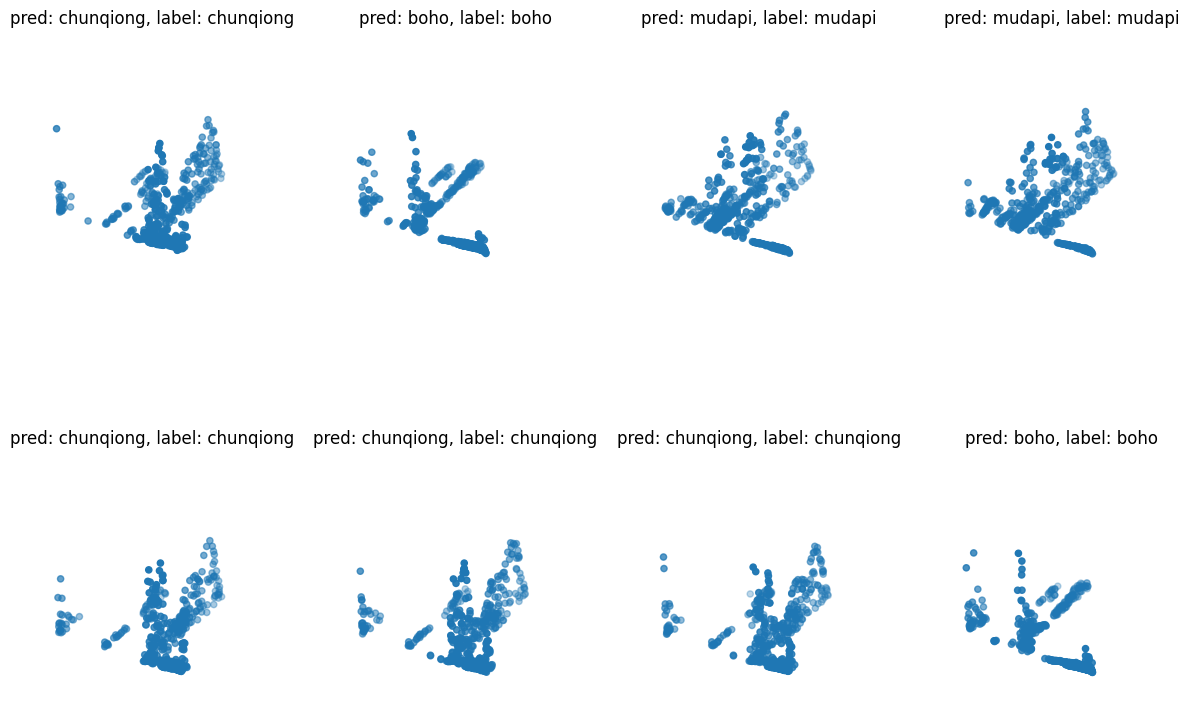

In [37]:
data = test_dataset.take(1)

points, labels = list(data)[0]
points = points[:8, ...]
labels = labels[:8, ...]

# run test data through model
preds = model.predict(points)
preds = keras_core.ops.argmax(preds, -1)

points = points.numpy()

# plot points with predicted class and label
fig = plt.figure(figsize=(15, 10))
for i in range(8):
    ax = fig.add_subplot(2, 4, i + 1, projection="3d")
    ax.scatter(points[i, :, 0], points[i, :, 1], points[i, :, 2])
    ax.set_title(
        "pred: {:}, label: {:}".format(
            CLASS_MAP[preds[i].numpy()], CLASS_MAP[labels.numpy()[i]]
        )
    )
    ax.set_axis_off()
plt.show()

#預測分割後資料

In [40]:
import numpy as np
#載入事先儲存好之data，記得要正規化
test_points= np.load('/content/drive/MyDrive/點雲圖資料/classification/custom_point_class.npy')
test_labels= np.load('/content/drive/MyDrive/點雲圖資料/classification/custom_labels.npy')


In [41]:
print(test_points.shape)
print(test_labels.shape)

(12, 500, 3)
(12,)


In [ ]:
def augment(points, label):
    # jitter points
    points += tensorflow.random.uniform(points.shape, -0.005, 0.005, dtype="float64")
    # shuffle points
    points = tensorflow.random.shuffle(points)
    return points, label


train_size = 0.8
dataset = tf_data.Dataset.from_tensor_slices((train_points, train_labels))
test_dataset = tf_data.Dataset.from_tensor_slices((test_points, test_labels))
train_dataset_size = int(len(dataset) * train_size)

dataset = dataset.shuffle(len(train_points)).map(augment)
test_dataset = test_dataset.shuffle(len(test_points)).batch(BATCH_SIZE)

train_dataset = dataset.take(train_dataset_size).batch(BATCH_SIZE)
validation_dataset = dataset.skip(train_dataset_size).batch(BATCH_SIZE)

In [ ]:
data = test_dataset.take(1)

points, labels = list(data)[0]


# run test data through model
preds = model.predict(points)
preds = keras_core.ops.argmax(preds, -1)

points = points.numpy()

# plot points with predicted class and label
fig = plt.figure(figsize=(15, 10))
for i in range(12):
    ax = fig.add_subplot(3, 4, i + 1, projection="3d")
    ax.scatter(points[i, :, 0], points[i, :, 1], points[i, :, 2])
    ax.set_title(
        "pred: {:}, label: {:}".format(
            CLASS_MAP[preds[i].numpy()], CLASS_MAP[labels.numpy()[i]]
        )
    )
    ax.set_axis_off()
plt.show()